불균형 데이터 만들기

In [ ]:
import numpy as np
import pandas as pd
num_sample_A = 1000
num_sample_B = 100

# 피처값이 평균이 0이고 표준편차가 1인 정규분포에서 샘플링
feature_A = np.random.normal(loc=0,scale=1,size=(num_sample_A,2))
feature_B = np.random.normal(loc=0,scale=1,size=(num_sample_B,2))

df_A = pd.DataFrame(feature_A,columns=['A','B'])
df_B = pd.DataFrame(feature_B,columns=['A','B'])
df_A['target'] = 'A'
df_B['target'] = 'B'

data = pd.concat([df_A,df_B])
data.head(1)

,A,B,target
0,-1.487537,-0.578501,A


UnderSampling
  - 클래스간의 불균형이 심한 데이터셋에서 다수 클래스의 샘플수를 적절히 감소시켜 클래스간의 균형을 맞춘다

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [3]:
# 불균형 클래스 데이터셋 생성
X,y = make_classification(n_classes=2,class_sep=2,weights=[0.1,0.9,])

In [5]:
# 클래스 분포 확인
Counter(y)

Counter({1: 90, 0: 10})

언더샘플링 수행

In [6]:
undersample = RandomUnderSampler(sampling_strategy='auto',random_state=42)
X_resampled,y_resampled = undersample.fit_resample(X,y)

In [7]:
Counter(y_resampled)

Counter({0: 10, 1: 10})

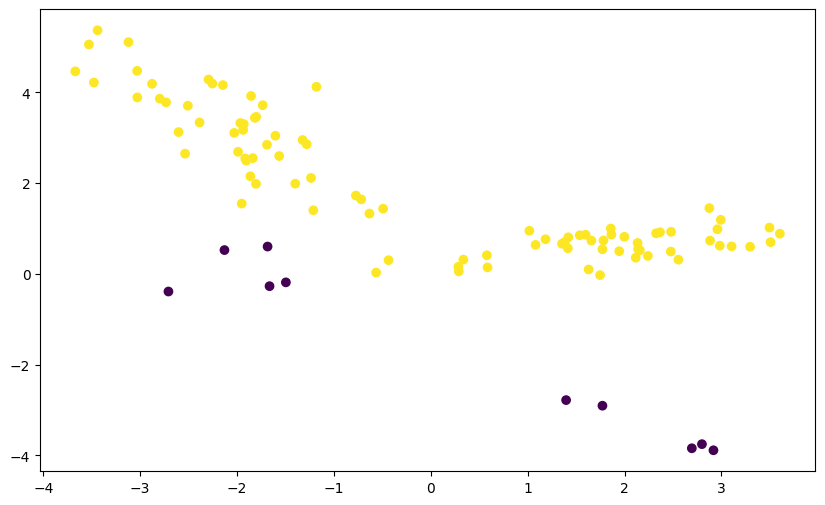

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y)

언더셈플링 결과 시각화

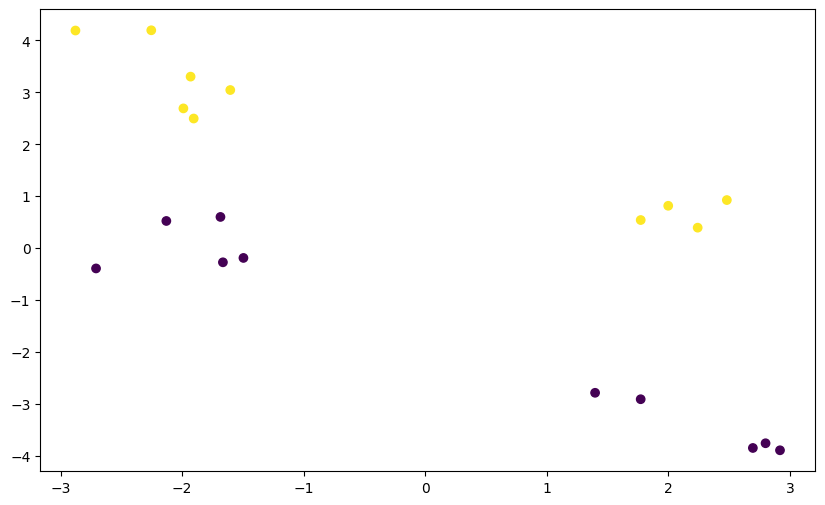

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled)

오버셈플링
  - 소수 클래스의 샘플을 복제하거나 인공적으로 생성해서 클래스간의 균형을 맞춘다

In [10]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
X,y = make_classification(n_classes=2,class_sep=2,weights=[0.1,0.9,])
print(Counter(y))
oversample = RandomOverSampler(sampling_strategy='auto',random_state=42)
X_resampled,y_resampled = oversample.fit_resample(X,y)
print(Counter(y_resampled))

Counter({1: 89, 0: 11})
Counter({1: 89, 0: 89})


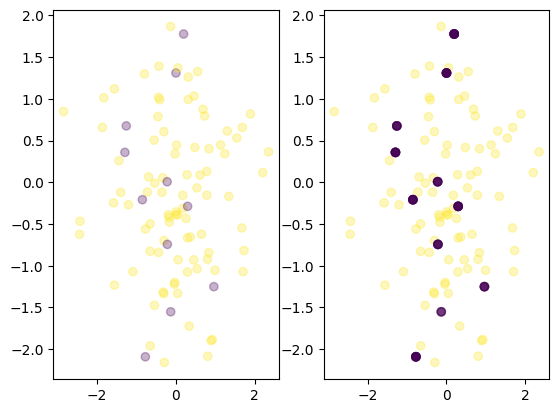

In [35]:
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.3)

plt.subplot(1,2,2)
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,alpha=0.3)

plt.show()

SMOTE(Synthetic Minority Over-sampling Technique)
  - 소수클래스의 샘플을 인접한 데이터 포인트들을 사용하여 합성하는 방식
  - 새로운 소스 클래스 샘프을 생성


Counter({1: 89, 0: 89})


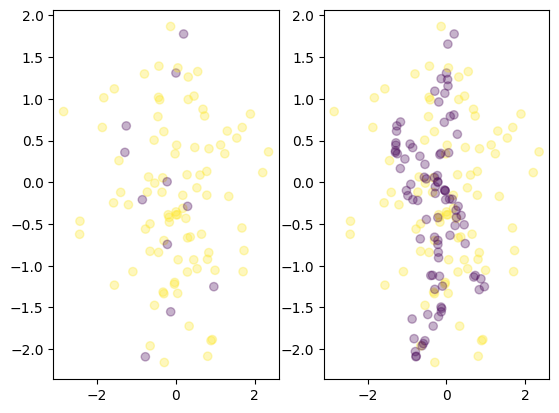

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)
print(Counter(y_resampled))

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.3)

plt.subplot(1,2,2)
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,alpha=0.3)

plt.show()